In [1]:
import pandas as pd
import numpy as np
import random

import tensorflow as tf
from tensorflow import keras

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi

Sat Jun  3 12:23:20 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   55C    P8              13W / 200W |   2010MiB /  8192MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
dtypes = {
    'Src IP': 'category',
    'Src Port': 'uint16',
    'Dst IP': 'category',
    'Dst Port': 'uint16',
    'Protocol': 'category',
    'Flow Duration': 'uint32',
    'Tot Fwd Pkts': 'uint32',
    'Tot Bwd Pkts': 'uint32',
    'TotLen Fwd Pkts': 'float32',
    'TotLen Bwd Pkts': 'float32',
    'Fwd Pkt Len Max': 'float32',
    'Fwd Pkt Len Min': 'float32',
    'Fwd Pkt Len Mean': 'float32',
    'Fwd Pkt Len Std': 'float32',
    'Bwd Pkt Len Max': 'float32',
    'Bwd Pkt Len Min': 'float32',
    'Bwd Pkt Len Mean': 'float32',
    'Bwd Pkt Len Std': 'float32',
    'Flow Byts/s': 'float32',
    'Flow Pkts/s': 'float32',
    'Flow IAT Mean': 'float32',
    'Flow IAT Std': 'float32',
    'Flow IAT Max': 'float32',
    'Flow IAT Min': 'float32',
    'Fwd IAT Tot': 'float32',
    'Fwd IAT Mean': 'float32',
    'Fwd IAT Std': 'float32',
    'Fwd IAT Max': 'float32',
    'Fwd IAT Min': 'float32',
    'Bwd IAT Tot': 'float32',
    'Bwd IAT Mean': 'float32',
    'Bwd IAT Std': 'float32',
    'Bwd IAT Max': 'float32',
    'Bwd IAT Min': 'float32',
    'Fwd PSH Flags': 'category',
    'Bwd PSH Flags': 'category',
    'Fwd URG Flags': 'category',
    'Bwd URG Flags': 'category',
    'Fwd Header Len': 'uint32',
    'Bwd Header Len': 'uint32',
    'Fwd Pkts/s': 'float32',
    'Bwd Pkts/s': 'float32',
    'Pkt Len Min': 'float32',
    'Pkt Len Max': 'float32',
    'Pkt Len Mean': 'float32',
    'Pkt Len Std': 'float32',
    'Pkt Len Var': 'float32',
    'FIN Flag Cnt': 'category',
    'SYN Flag Cnt': 'category',
    'RST Flag Cnt': 'category',
    'PSH Flag Cnt': 'category',
    'ACK Flag Cnt': 'category',
    'URG Flag Cnt': 'category',
    'CWE Flag Count': 'category',
    'ECE Flag Cnt': 'category',
    'Down/Up Ratio': 'float32',
    'Pkt Size Avg': 'float32',
    'Fwd Seg Size Avg': 'float32',
    'Bwd Seg Size Avg': 'float32',
    'Fwd Byts/b Avg': 'uint32',
    'Fwd Pkts/b Avg': 'uint32',
    'Fwd Blk Rate Avg': 'uint32',
    'Bwd Byts/b Avg': 'uint32',
    'Bwd Pkts/b Avg': 'uint32',
    'Bwd Blk Rate Avg': 'uint32',
    'Subflow Fwd Pkts': 'uint32',
    'Subflow Fwd Byts': 'uint32',
    'Subflow Bwd Pkts': 'uint32',
    'Subflow Bwd Byts': 'uint32',
    'Init Fwd Win Byts': 'uint32',
    'Init Bwd Win Byts': 'uint32',
    'Fwd Act Data Pkts': 'uint32',
    'Fwd Seg Size Min': 'uint32',
    'Active Mean': 'float32',
    'Active Std': 'float32',
    'Active Max': 'float32',
    'Active Min': 'float32',
    'Idle Mean': 'float32',
    'Idle Std': 'float32',
    'Idle Max': 'float32',
    'Idle Min': 'float32',
    'Label': 'category'
}

In [6]:
p = 0.10  # 10% of the data

df = pd.read_csv('H:/Datasets/kaggle_ddos/final_dataset.csv', dtype=dtypes, 
                 skiprows=lambda i: i>0 and random.random() > p, low_memory=False)
del dtypes

In [7]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,831,192.168.4.118-203.73.24.75-4529-80-6,192.168.4.118,4529,203.73.24.75,80,6,12/06/2010 08:36:45 AM,135,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,856,192.168.4.118-203.73.24.75-4533-80-6,192.168.4.118,4533,203.73.24.75,80,6,12/06/2010 08:36:58 AM,91,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,881,192.168.4.118-203.73.24.75-4541-80-6,192.168.4.118,4541,203.73.24.75,80,6,12/06/2010 08:37:07 AM,478574,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,887,192.168.4.118-203.73.24.75-4543-80-6,192.168.4.118,4543,203.73.24.75,80,6,12/06/2010 08:37:08 AM,1242607,9,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,937,192.168.1.103-97.74.144.108-1722-80-6,192.168.1.103,1722,97.74.144.108,80,6,12/06/2010 08:37:23 AM,1859292,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [8]:
df.describe()

,Unnamed: 0,Src Port,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,...,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06,1.278011e+06
mean,2.661006e+06,3.709751e+04,1.464420e+04,8.184938e+06,2.342330e+01,5.290649e+00,9.985665e+02,4.002615e+03,2.905067e+02,7.105572e+00,...,2.015726e+01,8.114008e+00,1.375589e+05,6.887883e+04,2.052405e+05,9.125988e+04,3.114652e+06,1.078926e+05,3.208799e+06,3.014922e+06
std,2.168704e+06,2.522040e+04,2.306760e+04,2.499296e+07,1.558811e+03,3.435476e+02,4.919768e+04,8.104006e+05,3.933541e+02,1.969757e+01,...,1.537056e+03,9.136056e+00,2.307885e+06,1.394569e+06,3.051797e+06,1.947192e+06,1.220125e+07,1.395475e+06,1.245570e+07,1.209093e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.979560e+05,4.430000e+02,8.000000e+01,1.261000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.039471e+06,5.059700e+04,8.000000e+01,3.185200e+04,2.000000e+00,1.000000e+00,4.200000e+01,1.120000e+02,4.000000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.897440e+06,5.624000e+04,3.853000e+04,4.157535e+06,4.000000e+00,4.000000e+00,9.350000e+02,3.580000e+02,6.770000e+02,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.902448e+06,6.553500e+04,6.553400e+04,4.294967e+09,2.373490e+05,2.839010e+05,7.595168e+06,6.296003e+08,1.606000e+04,1.472000e+03,...,2.373490e+05,4.400000e+01,1.112835e+08,6.879098e+07,1.112835e+08,1.112835e+08,1.199882e+08,7.599266e+07,1.199882e+08,1.199882e+08


In [9]:
df.shape

(1278011, 85)

In [10]:
colsToDrop = np.array(['Src IP', 'Dst IP', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 
                       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Flow ID', 'Timestamp', 'Unnamed: 0'])

In [11]:
df = df.rename(columns={'label': 'Label'})

In [12]:
df.Label.value_counts()

ddos      646389
Benign    631622
Name: Label, dtype: int64

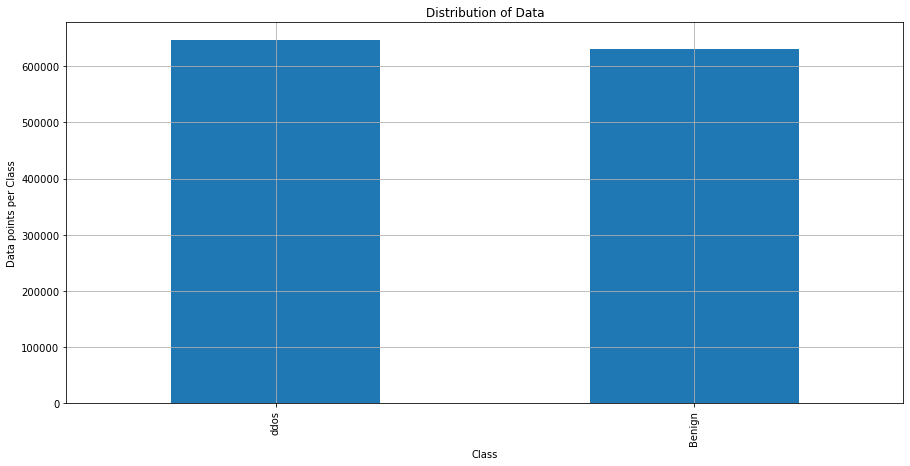

In [13]:
# Exploratory data analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Data')
plt.grid()
plt.show()

In [14]:
# counting unique values and checking for skewness in the data
rowbuilder = lambda col: {'col': col, 'unique_values': df[col].nunique(), 'most_frequent_value': df[col].value_counts().index[0],'frequency': df[col].value_counts(normalize=True).values[0]}
frequency = [rowbuilder(col) for col in df.select_dtypes(include=['category']).columns]
skewed = pd.DataFrame(frequency)
skewed = skewed[skewed['frequency'] >= 0.95]
colsToDrop = np.union1d(colsToDrop, skewed['col'].values)
colsToDrop
del skewed
del rowbuilder
del frequency

missing = df.isna().sum()
missing = pd.DataFrame({'count': missing, '% of total': missing/len(df)*100}, index=df.columns)
colsToDrop = np.union1d(colsToDrop, missing[missing['% of total'] >= 50].index.values)
dropnaCols = missing[(missing['% of total'] > 0) & (missing['% of total'] <= 5)].index.values

In [15]:
df['Flow Byts/s'].replace(np.inf, np.nan, inplace=True)
df['Flow Pkts/s'].replace(np.inf, np.nan, inplace=True)
dropnaCols = np.union1d(dropnaCols, ['Flow Byts/s', 'Flow Pkts/s'])

In [16]:
# perform actual drop
df.drop(columns=colsToDrop, inplace=True)
df.dropna(subset=dropnaCols, inplace=True)

print('After dropping some columns: \n\t there are {} columns and {} rows'.format(len(df.columns), len(df)))

After dropping some columns: 
	 there are 68 columns and 1273270 rows


In [17]:
negValCols = ['Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min']
for col in negValCols:
    df = df[df[col] >= 0]

In [18]:
df.describe()

,Src Port,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,...,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06,1.273224e+06
mean,3.723088e+04,1.450845e+04,8.210078e+06,2.313363e+01,4.842093e+00,1.002113e+03,2.875697e+03,2.915275e+02,7.130953e+00,7.623763e+01,...,2.023237e+01,8.070718e+00,1.380251e+05,6.912317e+04,2.059417e+05,9.156066e+04,3.125685e+06,1.082937e+05,3.220184e+06,3.025588e+06
std,2.516909e+04,2.299897e+04,2.474097e+07,1.540472e+03,1.168300e+02,4.928998e+04,1.681727e+05,3.936677e+02,1.972144e+01,9.425118e+01,...,1.539942e+03,9.124339e+00,2.312038e+06,1.397170e+06,3.057354e+06,1.950657e+06,1.221854e+07,1.398069e+06,1.247329e+07,1.210786e+07
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.430000e+02,8.000000e+01,1.279000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.062700e+04,8.000000e+01,3.249400e+04,2.000000e+00,1.000000e+00,4.200000e+01,1.150000e+02,4.000000e+01,0.000000e+00,3.600000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.627200e+04,3.797600e+04,4.164903e+06,4.000000e+00,4.000000e+00,9.350000e+02,3.580000e+02,6.770000e+02,0.000000e+00,1.430000e+02,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,6.553400e+04,1.200000e+08,2.373490e+05,2.758900e+04,7.595168e+06,3.802143e+07,1.606000e+04,1.472000e+03,2.025714e+03,...,2.373490e+05,4.400000e+01,1.112835e+08,6.879098e+07,1.112835e+08,1.112835e+08,1.199882e+08,7.599266e+07,1.199882e+08,1.199882e+08


In [19]:
df.shape

(1273224, 68)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


#drop na values and reset index
data_clean = df.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

1    646389
0    626835
Name: Label, dtype: int64

In [21]:
data_clean.shape

(1273224, 69)

In [22]:
data_clean.columns

Index(['index', 'Src Port', 'Dst Port', 'Protocol', 'Flow Duration',
       'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bw

In [23]:
data_clean.head()

,index,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,4529,80,6,135,1,1,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,4533,80,6,91,1,1,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,4541,80,6,478574,2,5,92.0,958.0,92.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,4543,80,6,1242607,9,19,105.0,20702.0,105.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,1722,80,6,1859292,1,1,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [24]:
data_np = data_clean.to_numpy(dtype="float32")
data_np = data_np[~np.isinf(data_np).any(axis=1)]

#del df

X = data_np[:, 0:67]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,68:]).toarray()

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

In [26]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(954918, 67)
(954918, 2)
(318306, 67)
(318306, 2)


In [27]:
print(X.shape)
print(Y.shape)

(1273224, 67)
(1273224, 2)


# DNN Model

In [28]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Dropout
from sklearn import metrics


In [29]:
# Simple 3 Layer Dense Model
model = Sequential()

model.add(Dense(64, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes, activation = 'softmax'))

model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test))
                              #callbacks=[reduce_lr, early_stop_callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4352      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [30]:
#model.save('H:/Datasets/kaggle_ddos/dnn_model.h5')

In [31]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

9948/9948 [==============================] - 8s 825us/step


In [32]:
pred.shape
y_test.shape

(318306,)

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[156525,      5],
       [     4, 161772]], dtype=int64)

In [ ]:
cf_matrix = confusion_matrix(y_test, pred)

labels = ['ddos', 'benign']

sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', xticklabels=labels, yticklabels=labels, cmap='Blues')

In [34]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

9948/9948 [==============================] - 9s 855us/step
Inference time: 11.28 seconds
Completed
Time taken: 0:00:26.718039
Validation score: 0.9999717253209176
Evaluation score: [0.00038026354741305113, 0.9999717473983765]
Recall score: 0.9999717253209176
Precision score: 0.9999717253377328
F1 Measure score: 0.9999717253194529
ROC-AUC score: 0.9999716658474943


In [36]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [37]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

In [ ]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.show()
plt.clf()


#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.title('Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

In [40]:
del data_np

# CNN

In [35]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, MaxPooling1D, Dropout
from sklearn import metrics


X_train = X_train.reshape(X_train.shape[0], 67, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 67, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, padding="same", activation="relu", input_shape=(_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(filters=256, kernel_size=6, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))

model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test))
                              #callbacks=[reduce_lr, early_stop_callback]) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 67, 128)           896       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 33, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 33, 256)           196864    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 16, 256)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [36]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))


#model.save('H:/Datasets/kaggle_ddos/balance_cnn_model.h5')

9948/9948 [==============================] - 9s 943us/step
Best loss: 5.181006054044701e-05
Balanced Acc loss: 99.99779508166564


In [43]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [37]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

9948/9948 [==============================] - 9s 951us/step


In [38]:
pred.shape
y_test.shape

(318306,)

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[156526,      4],
       [     3, 161773]], dtype=int64)

In [ ]:
cf_matrix = confusion_matrix(y_test, pred)

labels = ['DDoS', 'Benign']

sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', xticklabels=labels, yticklabels=labels, cmap='Blues')

In [40]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time 

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

9948/9948 [==============================] - 9s 920us/step
Inference time: 11.79 seconds
Completed
Time taken: 0:00:28.882801
Validation score: 0.999978008582936
Evaluation score: [5.1813920435961336e-05, 0.9999780058860779]
Recall score: 0.999978008582936
Precision score: 0.9999780086004023
F1 Measure score: 0.9999780085817966
ROC-AUC score: 0.9999779508166564


In [49]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

In [ ]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('CNN: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()

In [ ]:
#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('CNN: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('CNN: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()